# MUSHROOM CLASSIFICATION

## Our dataset has samples corresponding to 23 species of gilled mushrooms. The dataset we are considering contains over 8000 varities of mushrooms. For each mushroom it has been indicated whether it is edible or poisonous. Also, each mushroom has been classified based on  the features which are classified based on shape, color,  bruise, cap, odor,  and what type of stalk they have. 
### Each species is differentiated as either poisonous or edible.

### DATA:

Attribute Information:

classes : edible=e, poisonous=p  
cap-shape : bell=b,conical=c, convex=x, flat=f, knobbed=k, sunken=s     
cap-surface : fibrous=f, grooves=g,scaly=y, smooth=s  
cap-color : brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
bruises : bruises=t, no=f          
odor : almond=a, anise=l,creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s          
gill-attachment : attached=a, descending=d, free=f, notched=n            
gill-spacing : close=c, crowded=w, distant=d         
gill-size : broad=b, narrow=n                
gill-color : black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y                 
stalk-shape : enlarging=e, tapering=t                 
stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?            
stalk-surface-above-ring : fibrous=f, scaly=y, silky=k, smooth=s          
stalk-surface-below-ring : fibrous=f, scaly=y, silky=k, smooth=s
stalk-color-above-ring : brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y     
stalk-color-below-ring : brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y       
veil-type : partial=p, universal=u              
veil-color : brown=n, orange=o, white=w, yellow=y              
ring-number : none=n, one=o, two=t
ring-type : cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z        
spore-print-color : black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y       
population : abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y     
habitat : grasses=g, eaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [2]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 10, 15
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [108]:
mush_data = pd.read_csv("mushrooms.csv", sep = ",")

In [130]:
mush_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Exploratory Data Analysis

In [131]:
mush_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number                 8124 non-null object
ring-type  

CHECKING FOR NULL VALUES

In [54]:
mush_data.isnull().sum()



class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [29]:
mush_data.shape

(8124, 23)

In [6]:
mush_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#### So, we have 8124 members, 23 features of each member 

In [7]:
mush_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Thus we have 22 features(1st one is label) and 8124 instances.Now let us check which features constitutes maximum information.

We can see that the dataset has values in strings.We need to convert all the unique values to integers. Thus we perform label encoding on the data.

### Implying : Label Encoder 

In [157]:
Lable_mushy = pd.DataFrame()

for col in mush_data.columns:
   Lable_mushy[col] = LabelEncoder().fit_transform(mush_data[col])

Lable_mushy.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## Correlation of features 

#### We are looking at the correlation of features at first attempt to identify how linearly related they are to one another.

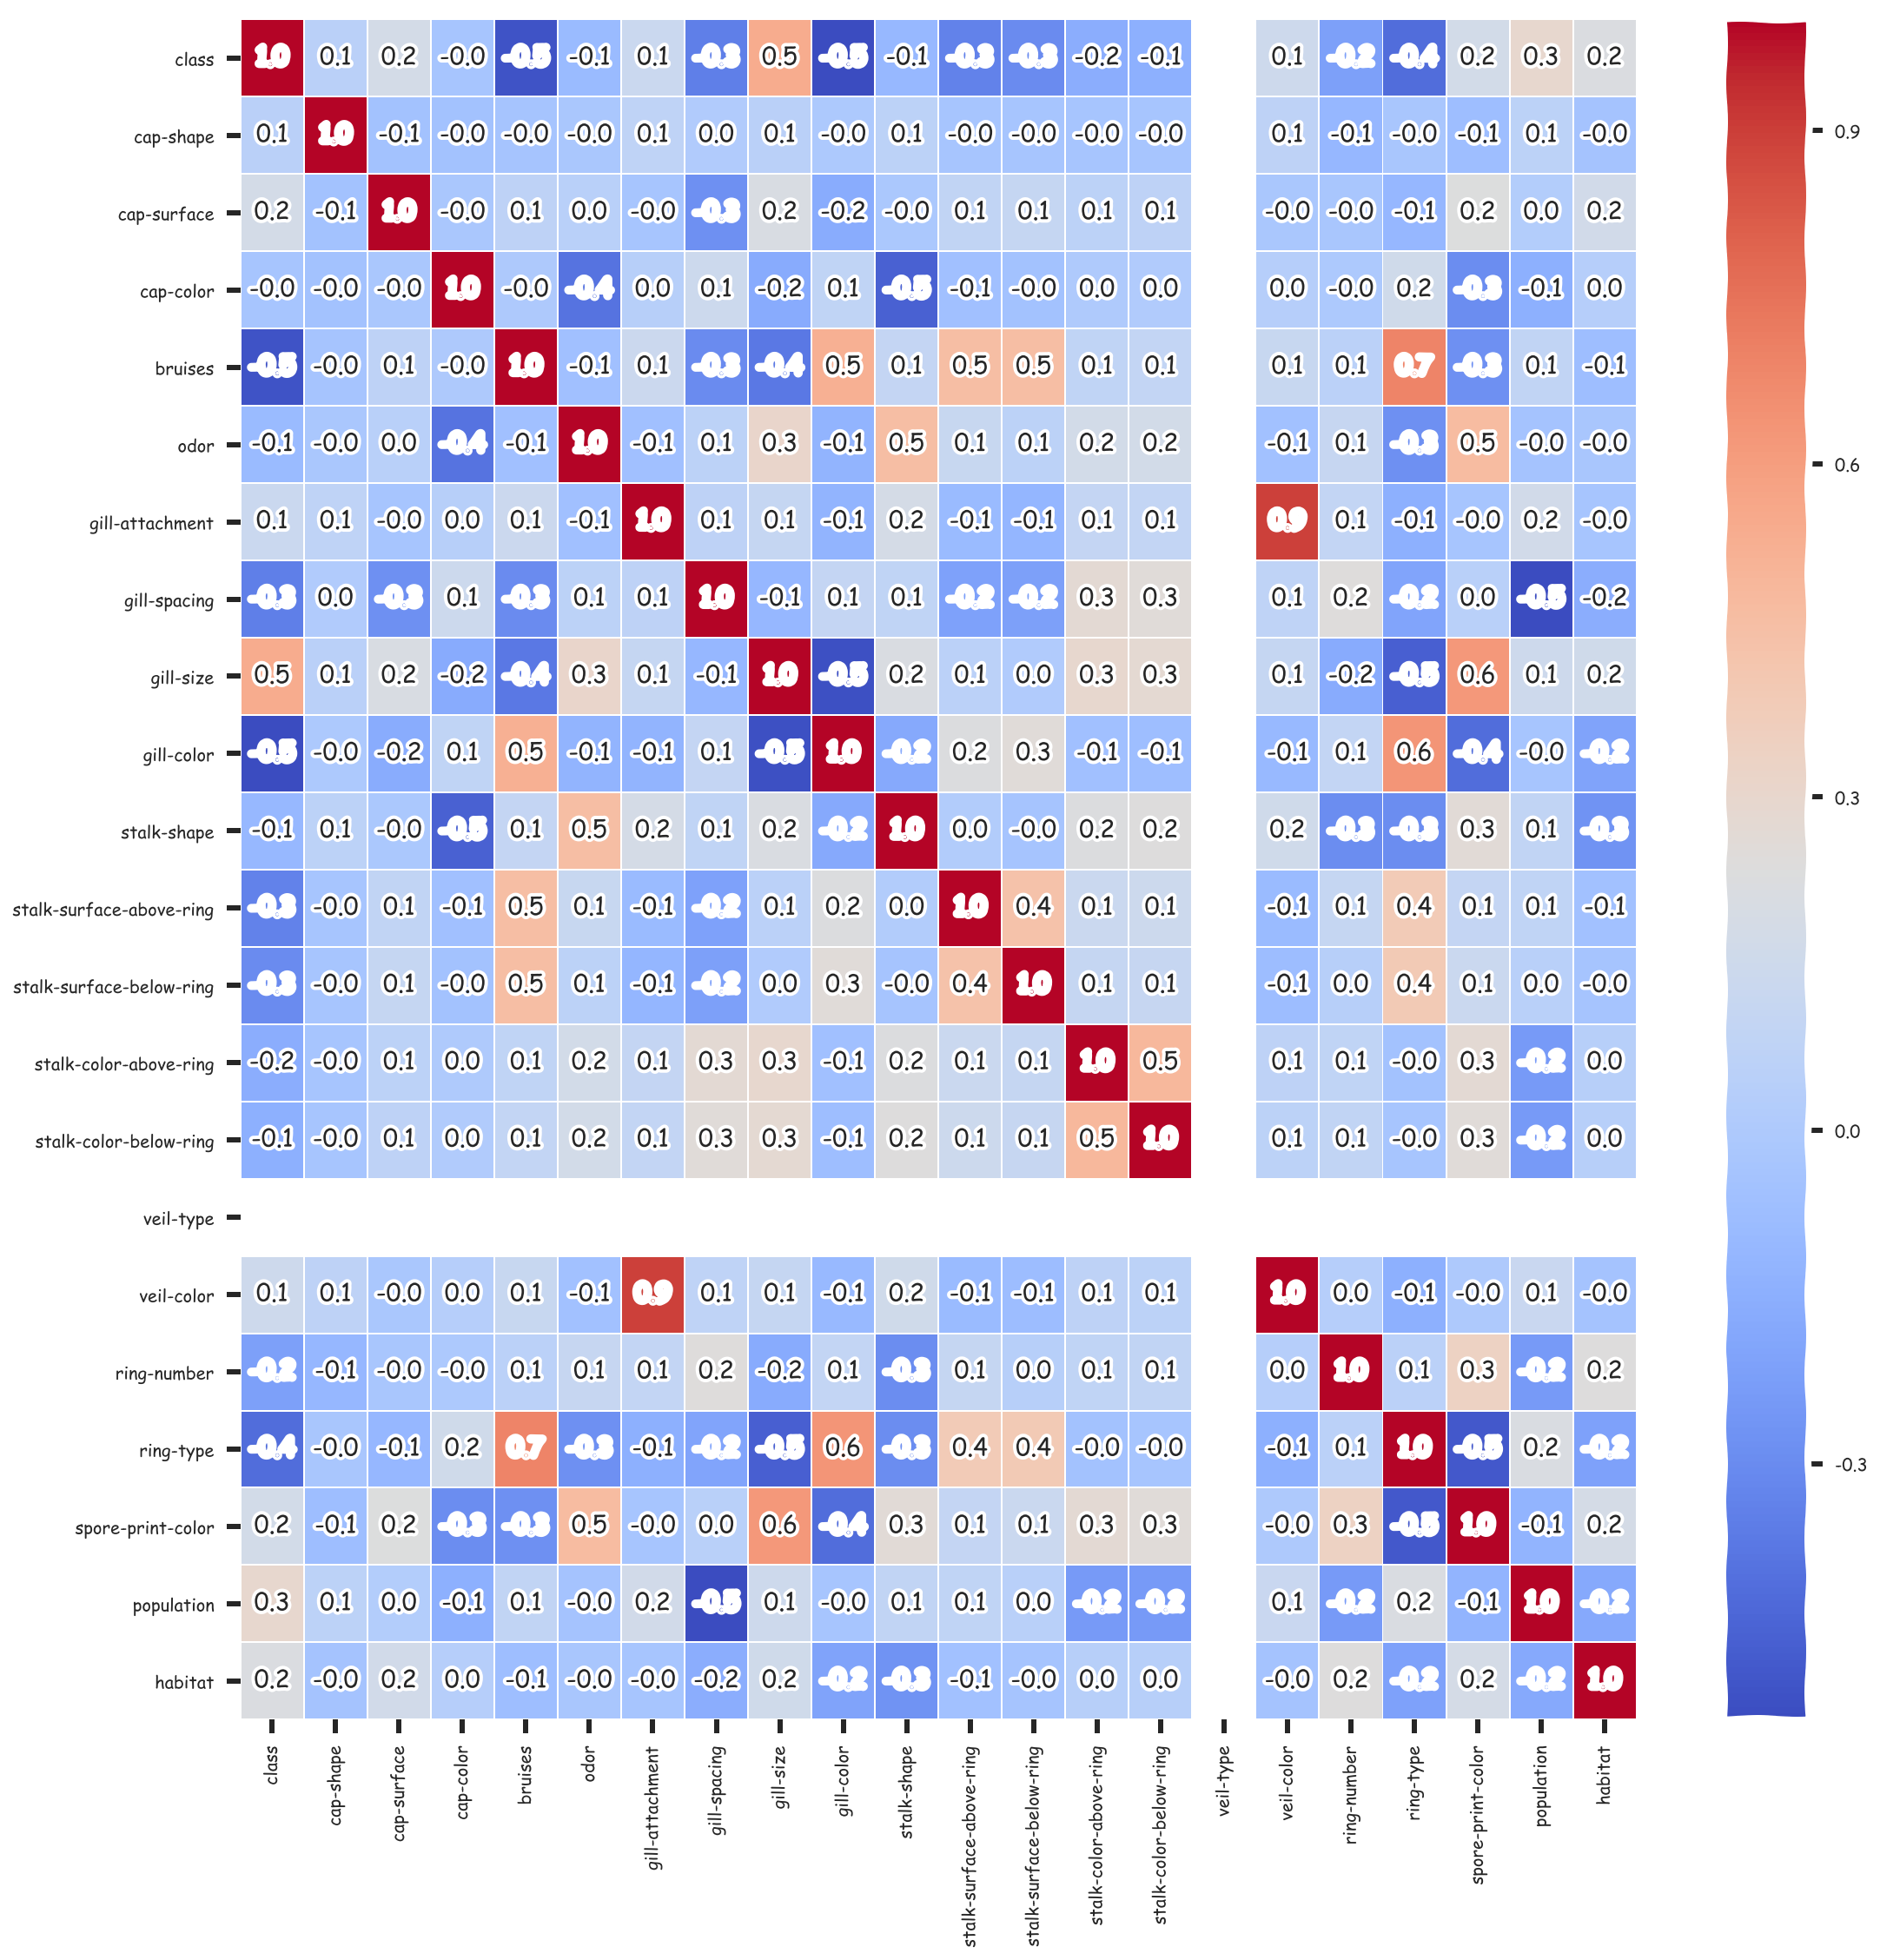

In [159]:
with plt.xkcd():

    f,ax = plt.subplots(figsize=(18, 18))
    g = sns.heatmap(Lable_mushy.corr(), annot=True, linewidths=.5, fmt= '.1f',cmap = "coolwarm",ax=ax)

### From this we get to know that, 5 of the mushroom features which are related to class : 

1. Bruise 
2. Gill- Color
3. Stalk- root
4. Ring- Type 
5. Gill-Size

### But, we are taking only Bruise and Gill-Color for analysis of Edible/Poisonous. 

In [12]:
sorted(mush_data['bruises'].unique())

['f', 't']

Bruises :
0 = not-bruise
1 = bruise

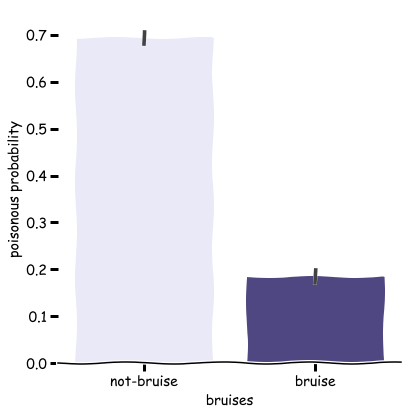

In [14]:
g = sns.factorplot(x="bruises",y="class",data=Lable_mushy,kind="bar", size = 6,  palette =["lavender","darkslateblue"], legend = True)
g.despine(left=True)

g.set(xticks=range(0,2), xticklabels=["not-bruise","bruise"])
g = g.set_ylabels("poisonous probability")

### From this we come to know that not-bruising mushrooms is very dangerous. 

In [22]:
sorted(mush_data['gill-color'].unique())

['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y']

From this , we get to know the gill-color :
0 = buff
1 = red
2 = gray
3 = chocolate
4 = black
5 = brown
6 = orange
7 = pink
8 = green
9 = purple
10 = white
11 = yellow

In [23]:
gillcolor = ["khaki","Red","lightGrey","chocolate","Black","saddleBrown","orange","lightpink","limegreen","orchid","whitesmoke","Yellow"]
gillname =["buff","red","gray","chocolate","black","brown","orange","pink","green","purple","white","yellow"]

In [25]:
counts = mush_data['gill-color'].value_counts(sort = True)
counts

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

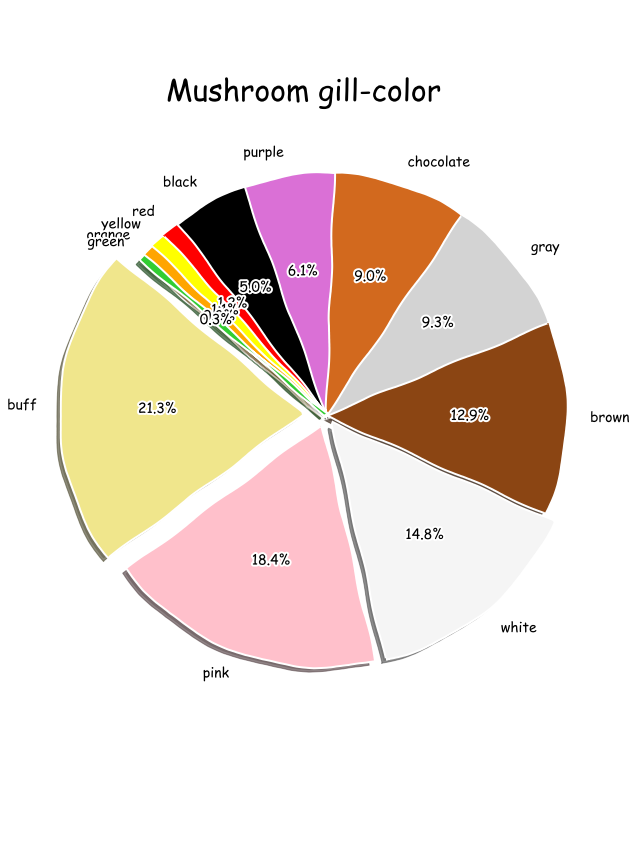

In [33]:
labels = ["buff","pink","white","brown","gray","chocolate","purple","black","red","yellow","orange","green"]
sizes = counts
colors = ["khaki","pink","whitesmoke","saddlebrown","lightgrey","chocolate","orchid","black","red","yellow","orange","limegreen"]
explode = (0.1,0.05, 0.05, 0,0,0,0,0,0,0,0,0)
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140,)
plt.axis('equal')
plt.figtext(.5,.8,'Mushroom gill-color',fontsize=30,ha='center')
plt.show()

### Checking Poisonous Probability with the Gill Color 

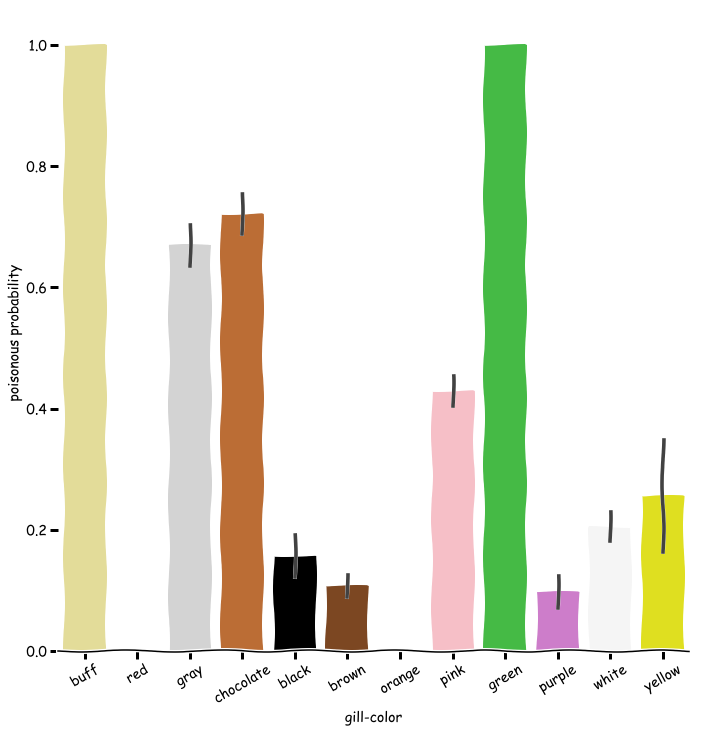

In [27]:
g = sns.factorplot(x="gill-color",y="class",data=Lable_mushy, kind="bar", size = 10 ,
palette = gillcolor)
g.despine(left=True)
g.set_xticklabels(rotation=30)
g.set( xticks=range(0,12),xticklabels=gillname)
g = g.set_ylabels("poisonous probability")

### So we get to know that, brown and black are the most safest one. 

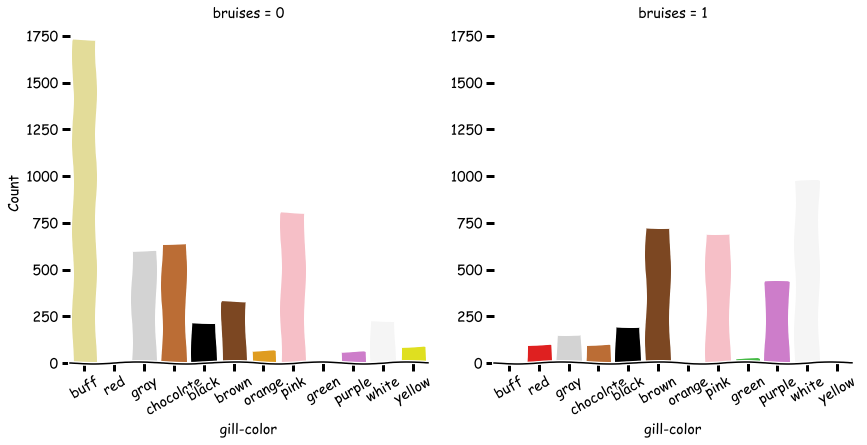

In [28]:
g = sns.factorplot("gill-color", col="bruises",  data=Lable_mushy,
                   size=6, kind="count", palette =gillcolor)
g.despine(left=True)

g.set( xticks=range(0,12),xticklabels=gillname)
g.set_xticklabels(rotation=30)
g = g.set_ylabels("Count")

From this we conclude that bruise and gill- color are the most significant features

### Most of the safe gill-color mushrooms appear a bruises, While the dangerous gill-color mushroom not appear a bruises

### Picking two features for classification : (Cap color, Odor) and doing some Statistical Analysis. 


## --> To understand the total number of mushrooms for each of the cap color. 

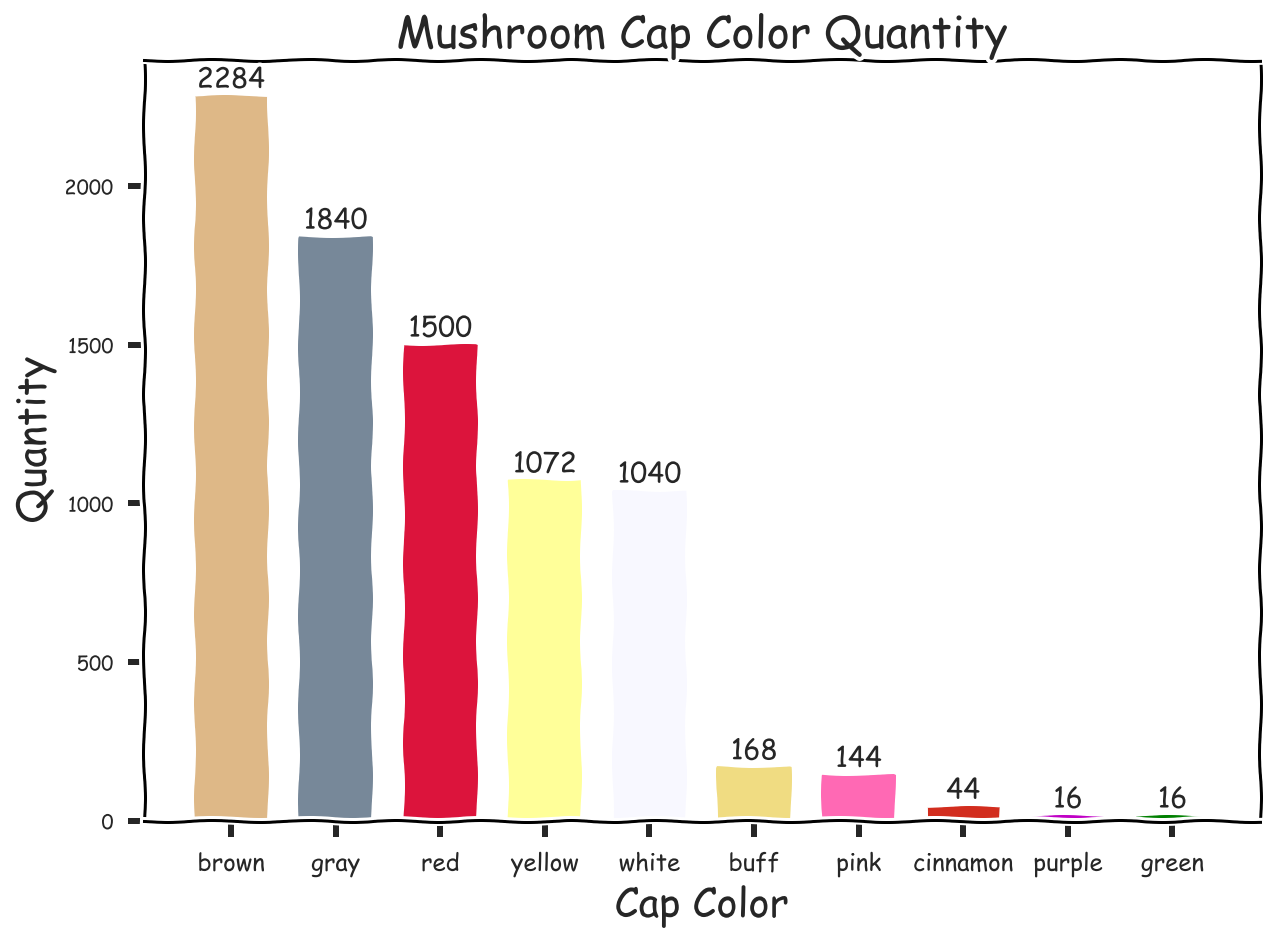

In [148]:
#Obtain total number of mushrooms for each cap-color
cap_colors = mush_data['cap-color'].value_counts()
m_height = cap_colors.values.tolist() #Provides numerical values
cap_colors.axes #Provides row labels
cap_color_labels = cap_colors.axes[0].tolist() #Converts index object to list

#=====PLOT Preparations and Plotting====#
ind = np.arange(10)  # the x locations for the groups
width = 0.7        # the width of the bars
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
#FFFFF0
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)

#Auto-labels the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show() #Display bars. 

### This shows the number of mushrooms based on their cap color 

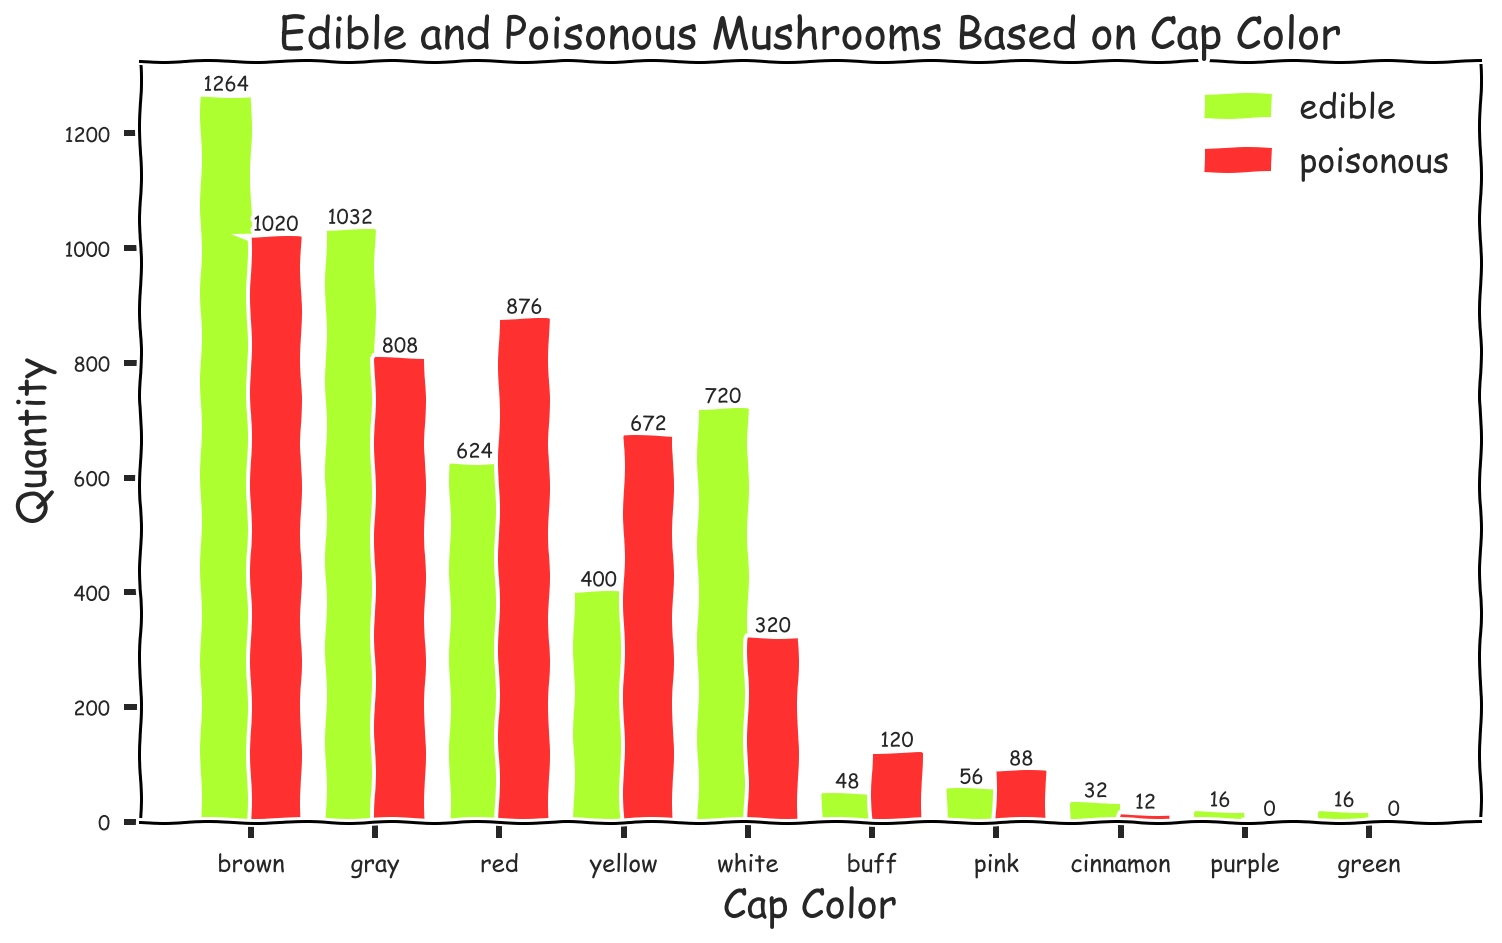

[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]
[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]


In [150]:
poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for capColor in cap_color_labels:
    size = len(mush_data[mush_data['cap-color'] == capColor].index)
    edibles = len(mush_data[(mush_data['cap-color'] == capColor) & (mush_data['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#FF3030')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_cc)
print(poisonous_cc)

### This shows the number of edible and poisonous mushrooms based on their cap color 


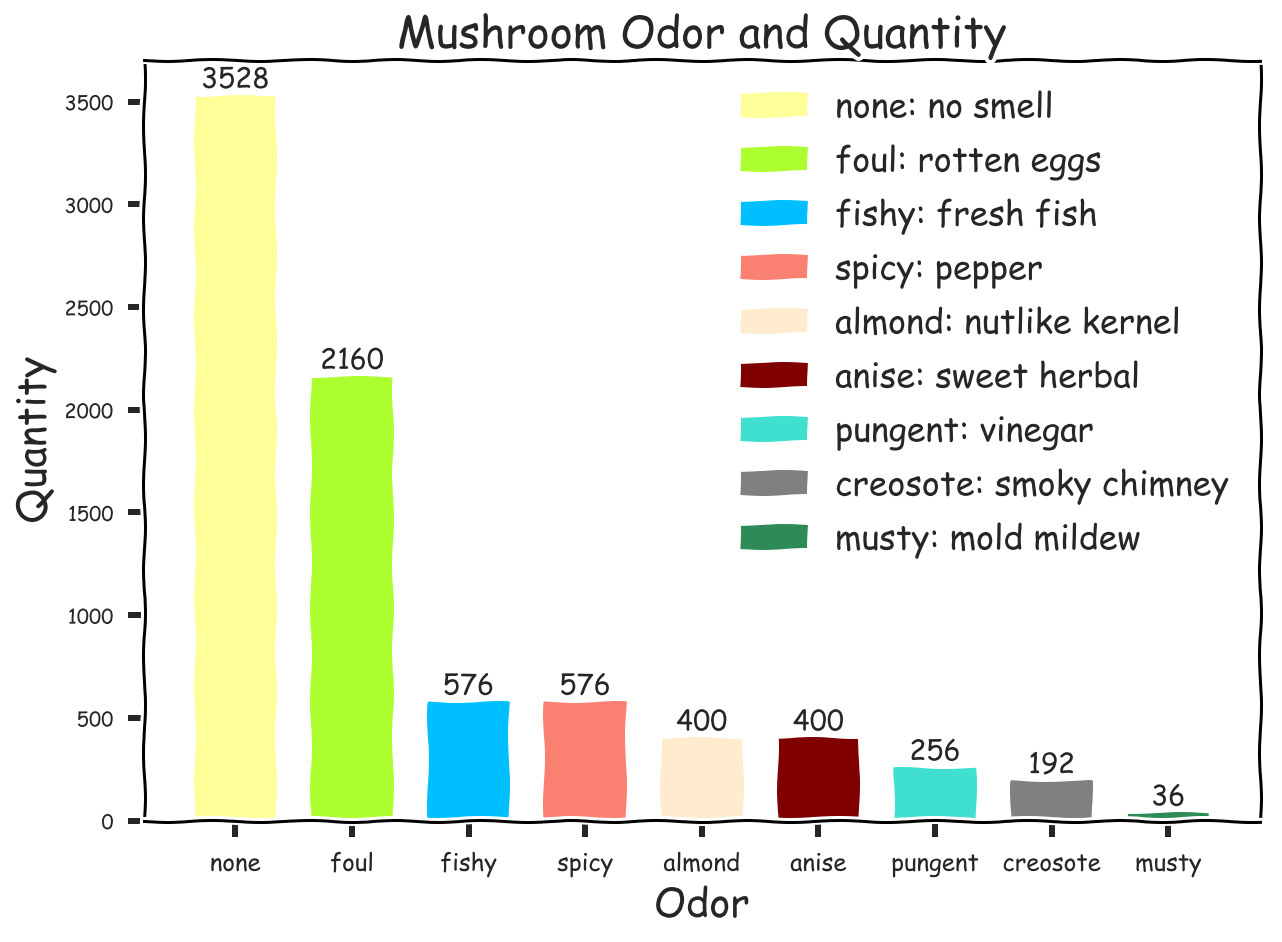

In [154]:
#Obtain total number of mushrooms for each 'odor' (Entire DataFrame)
odors = mush_data['odor'].value_counts()
odor_height = odors.values.tolist() #Provides numerical values
odor_labels = odors.axes[0].tolist() #Converts index labels object to list

#=====PLOT Preparations and Plotting====#
width = 0.7 
ind = np.arange(9)  # the x locations for the groups
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']

fig, ax = plt.subplots(figsize=(10,7))
odor_bars = ax.bar(ind, odor_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Odor and Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend(odor_bars, ['none: no smell','foul: rotten eggs', 'fishy: fresh fish','spicy: pepper',
                      'almond: nutlike kernel', 'anise: sweet herbal', 'pungent: vinegar',
                     'creosote: smoky chimney', 'musty: mold mildew'],fontsize=17)
autolabel(odor_bars)        
plt.show() #Display bars. 

### This shows number of mushrooms based on Odor

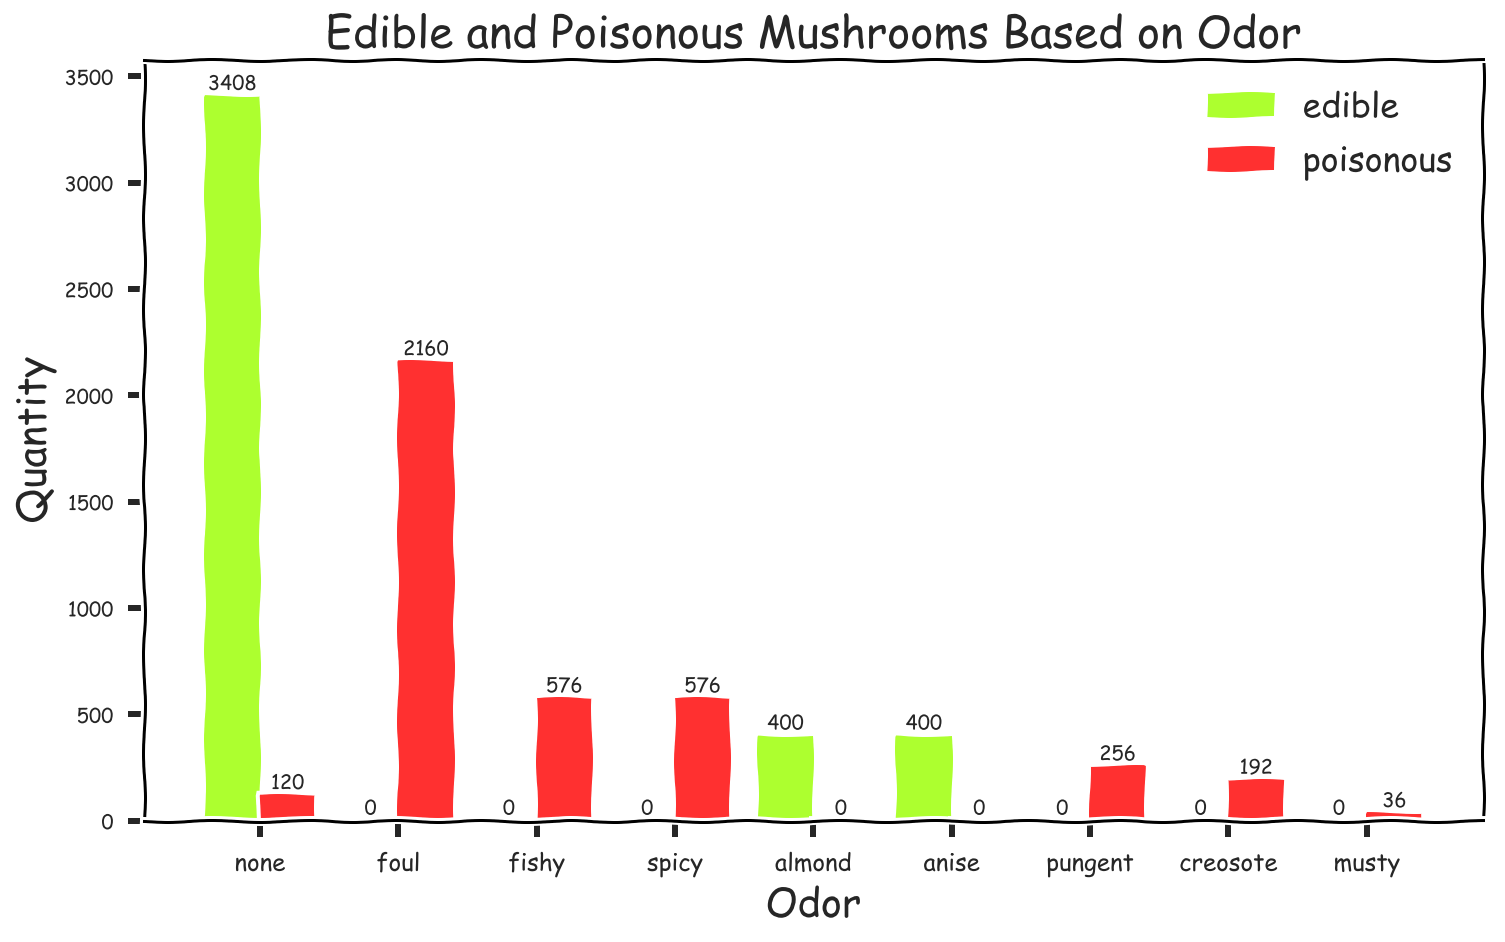

[3408, 0, 0, 0, 400, 400, 0, 0, 0]
[120, 2160, 576, 576, 0, 0, 256, 192, 36]


In [155]:
poisonous_od = [] #Poisonous odor list
edible_od = []    #Edible odor list
for odor in odor_labels:
    size = len(mush_data[mush_data['odor'] == odor].index)
    edibles = len(mush_data[(mush_data['odor'] == odor) & (mush_data['class'] == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_od , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='#FF3030')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_od)
print(poisonous_od)

### This shows the number of mushrooms which are edible or poisonous. 

# Comparing Models 

In [46]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [47]:
mush_data['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [50]:
100*len(mush_data.loc[mush_data['stalk-root']=='?']) / sum(mush_data['stalk-root'].value_counts())

30.526834071885769

In [51]:
mush_datadata = mush_data.drop('stalk-root', 1)

In [52]:
mush_data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

 ### Class Distribution: 
    --    edible: 4208 (51.8%)
    -- poisonous: 3916 (48.2%)
    --     total: 8124 instances

## From this we get to know the number of edible and poisonous mushrooms 

## Another way to find the best feature

In [125]:
# split out features and target labels

y = mush_data['class']
X = mush_data.drop(['class'], axis=1)

In [132]:
# split out the data into training and test set
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# The data can now be used in the neural network model

In [63]:
Y = pd.get_dummies(mush_data.iloc[:,0],  drop_first=False)
X = pd.DataFrame()
for each in mush_data.iloc[:,1:].columns:
    dummies = pd.get_dummies(mush_data[each], prefix=each, drop_first=False)
    X = pd.concat([X, dummies], axis=1)

## Now, we will compare the performance of: Logistic Regression, KNN, Trees, Naive Bayes, Suport Vector Machines and Random Forest

We are going to use cross validation and the AUC metric.

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(probability=True)))
models.append(('RF', RandomForestClassifier()))

### Evaluating each model in turn 

In [67]:
from sklearn.model_selection import cross_val_score, KFold

seed = 321

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train.iloc[:,1], cv=kfold, scoring='roc_auc')    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 1.000000 (0.000000)
KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 0.994432 (0.003970)
SVM: 0.999986 (0.000034)
RF: 1.000000 (0.000000)


### Comparing Algorithms

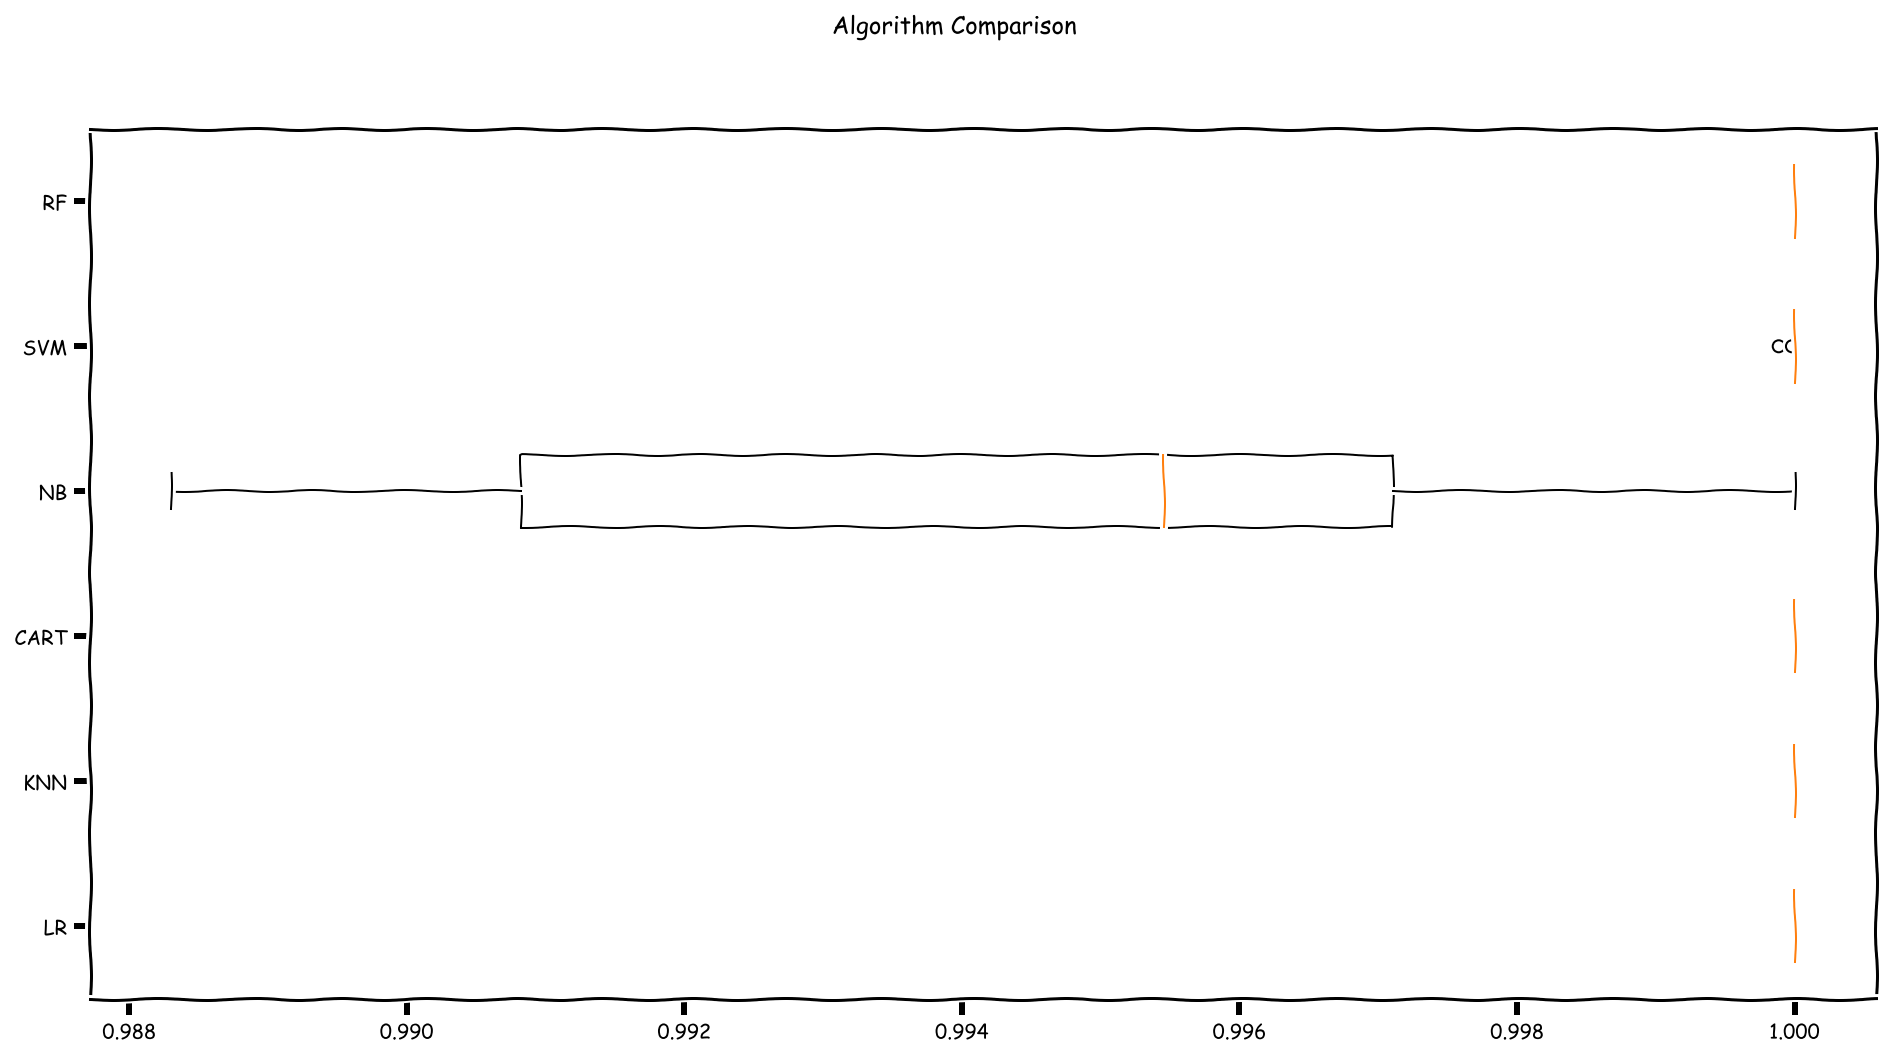

In [68]:

fig = plt.figure(figsize=(16, 8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, vert=False)
ax.set_yticklabels(names)
plt.show()

In [69]:
from collections import defaultdict
from sklearn.metrics import roc_auc_score

model_predictions = defaultdict()
model_score = defaultdict(np.float)
for name, model in models:
    model.fit(X_train, y_train.iloc[:,1])
    my_pred = model.predict(X_test)
    model_predictions[name] = my_pred
    model_score[name] = roc_auc_score(y_test.iloc[:,1], my_pred)

    msg = "%s: %f" % (name, model_score[name])
    print(msg) 

LR: 1.000000
KNN: 1.000000
CART: 1.000000
NB: 0.968310
SVM: 1.000000
RF: 1.000000


# Doing predictions 

In [70]:
model_predicions_df = pd.DataFrame(model_predictions)

In [71]:
corrmat = model_predicions_df.corr()
corrmat

,CART,KNN,LR,NB,RF,SVM
CART,1.000000,1.000000,1.000000,0.935661,1.000000,1.000000
KNN,1.000000,1.000000,1.000000,0.935661,1.000000,1.000000
LR,1.000000,1.000000,1.000000,0.935661,1.000000,1.000000
NB,0.935661,0.935661,0.935661,1.000000,0.935661,0.935661
RF,1.000000,1.000000,1.000000,0.935661,1.000000,1.000000
SVM,1.000000,1.000000,1.000000,0.935661,1.000000,1.000000


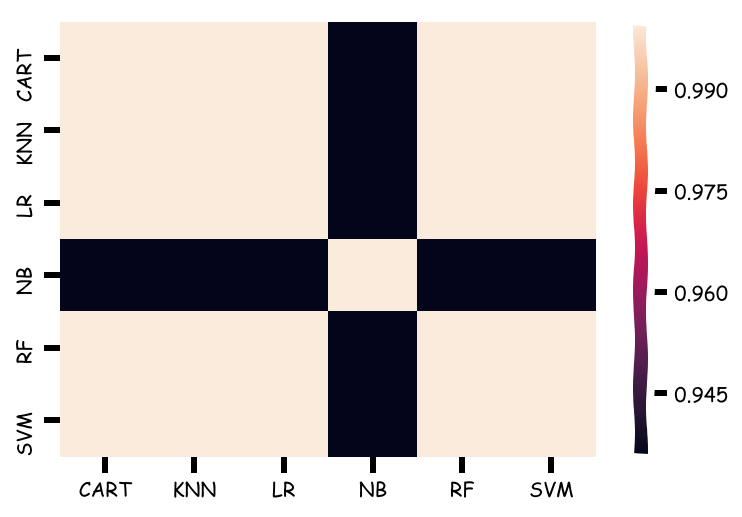

In [72]:
sns.heatmap(corrmat)
plt.show()

# Logistic Regression 
We are using this since out model has the outcome variable as categorical. Often this is used when the variable is binary. 
Logistic regression measures the relationship between the categorical response variable and one or more predictor variables by estimating probabilities.

In [73]:
# Importing the necessary files 

import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import scipy.optimize as opt  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [79]:
f=pd.read_csv("mushrooms.csv", sep=",")
mush_data=DataFrame(f)
mush_data.head()[:2]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


In [80]:
mush_data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

### Here we see that all the features of mushroom are in object type. Hence we need to encode them with appropriate numerical value. 

In [81]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in mush_data.columns:
    mush_data[col]=labelencoder.fit_transform(df[col])
mush_data.head()[:2]



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1


[Text(0,0.5,'No of unique elements'),
 Text(0.5,0,'Features'),
 Text(0.5,1,'Unique elements per column')]

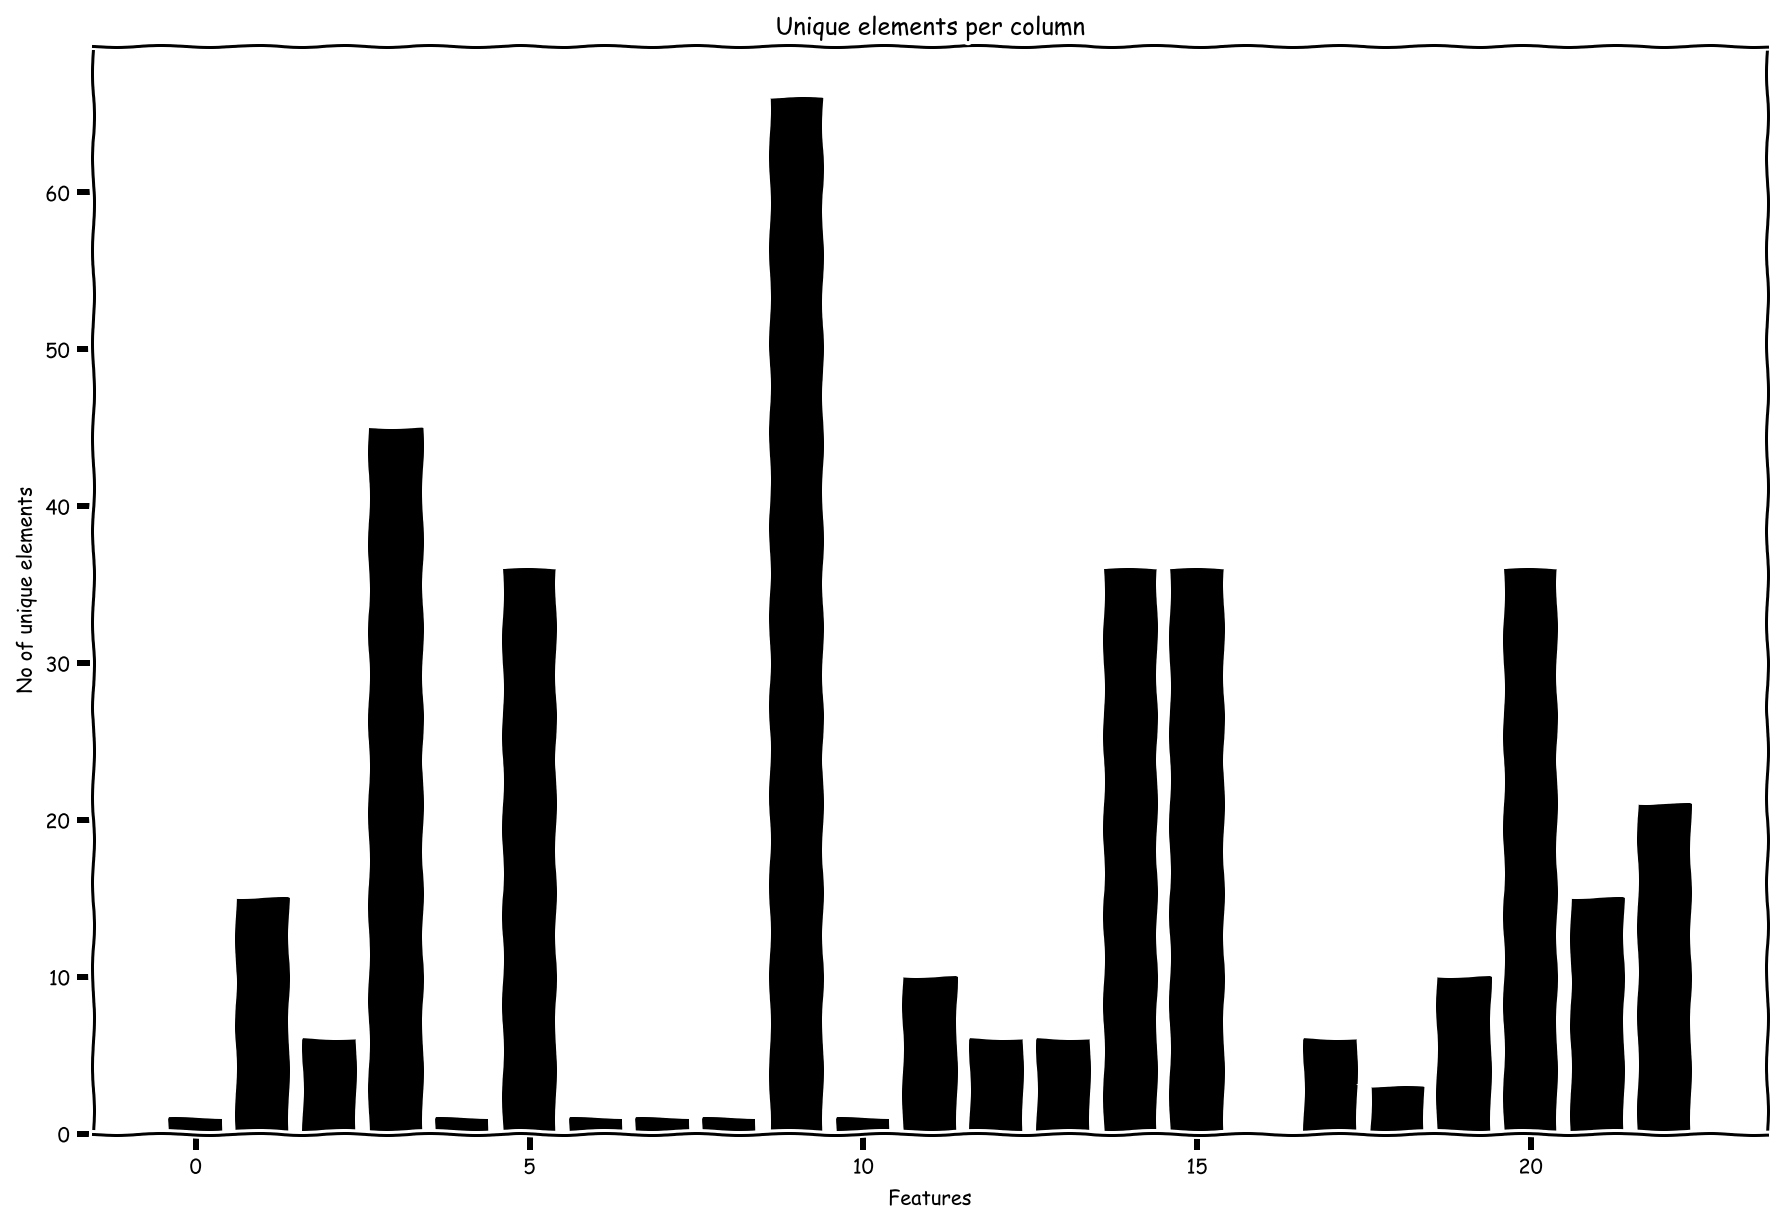

In [78]:
count_var=[]
for col in df.columns:
    count_var.append(df[col].unique().sum())
size=np.arange(len(count_var))
fig=plt.figure(figsize = (15,10))
ax=fig.add_subplot(1,1,1, axisbg='white')
ax.bar(size,count_var, color = 'k')
ax.set(title="Unique elements per column",
      ylabel='No of unique elements',
      xlabel='Features')

In [82]:
mush_data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


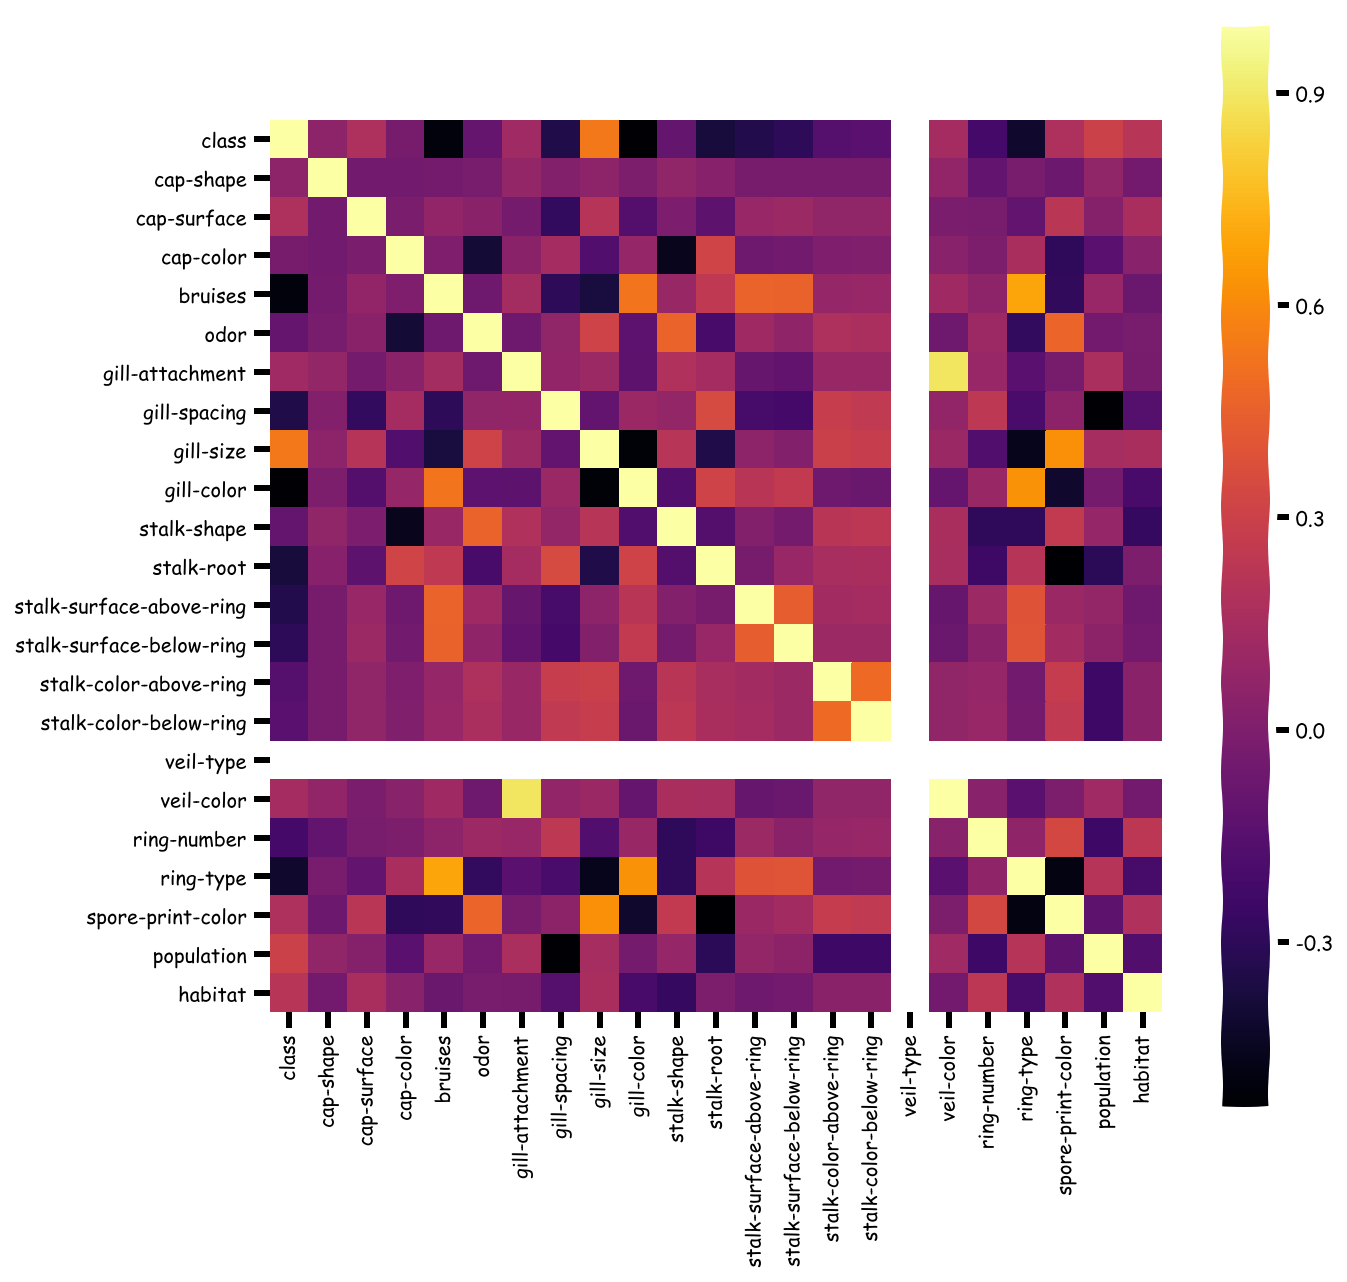

In [83]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap = 'inferno',square=True)

### We are dividing the train and target values. 

#### Selecting only two featues so that we can compare is easily. 

In [161]:
target=df['class']
train=df[['gill-size','gill-color']]
print(train.shape)
print(target.shape)

(8124, 2)
(8124,)


Text(0.5,1,'Class distribution')

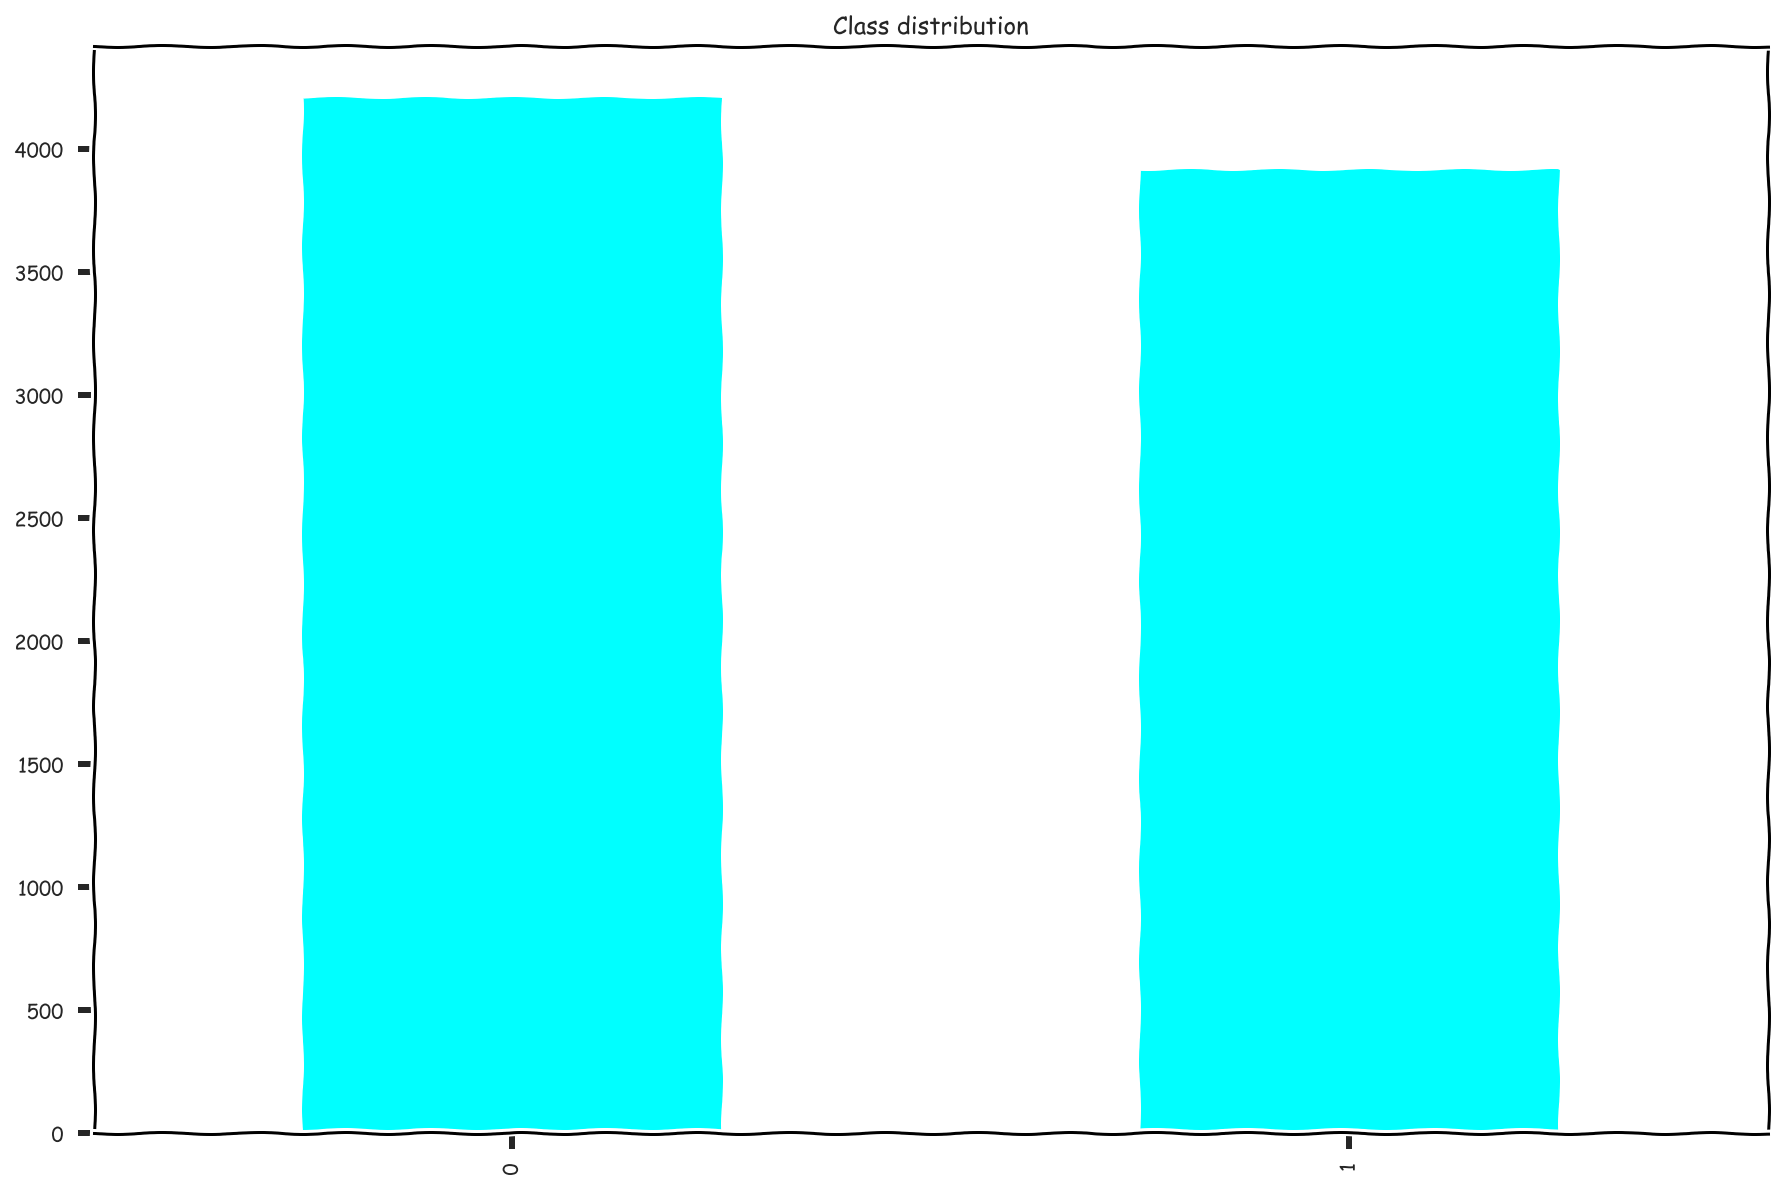

In [162]:
#Count of the classes
fig=plt.figure(figsize = (15,10))
ax=fig.add_subplot(1,1,1, axisbg='White')
pd.value_counts(target).plot(kind='bar', cmap = 'cool')
plt.title("Class distribution")

In [87]:
def pred_values(theta,X,hard=True):
    X = (X - np.mean(X,axis=0))/np.std(X,axis=0)
    pred_prob = sigmoid(theta,X)
    pred_value = np.where(pred_prob >= .5 ,1, 0)
    return pred_value

In [88]:
theta = np.zeros((train.shape)[1])
theta = np.asmatrix(theta)
theta = theta.T
target = np.asmatrix(target).T
y_test = list(target)

In [100]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train, target)
clf.score(train, target)

0.77252584933530277

### Hence we get the accuracy of 77%. 

# Neural Network model

We are going to build a neural network model with Keras. We'll check its accuracy, but our main objective here is to inspect the values of the hidden layer and to project them into a two dimension plot to see how the neural network identify by itself the different groups

In [110]:
mush_data['stalk-root'].value_counts()



b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

### Missing Attribute Values: 2480 of them (denoted by "?")

In [112]:
100*len(mush_data.loc[mush_data['stalk-root']=='?']) / sum(mush_data['stalk-root'].value_counts())

30.526834071885769

### More than 30 % of the stalk root values are missing here. 

In [114]:
mush_data = mush_data.drop('stalk-root', 1)

In [115]:
Y = pd.get_dummies(mush_data.iloc[:,0],  drop_first=False)
X = pd.DataFrame()
for each in mush_data.iloc[:,1:].columns:
    dummies = pd.get_dummies(mush_data[each], prefix=each, drop_first=False)
    X = pd.concat([X, dummies], axis=1)

# Building the Neural Network with Keras. 

In [116]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
from keras import backend as K
from keras.layers import BatchNormalization
seed = 123456 

def create_model():
    model = Sequential()
    model.add(Dense(20, input_dim=X.shape[1], kernel_initializer='uniform', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    #model.add(Dense(20, input_dim=X.shape[1], kernel_initializer='uniform', activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    #sgd = SGD(lr=0.01, momentum=0.7, decay=0, nesterov=False)
    model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])
    return model

Using TensorFlow backend.


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


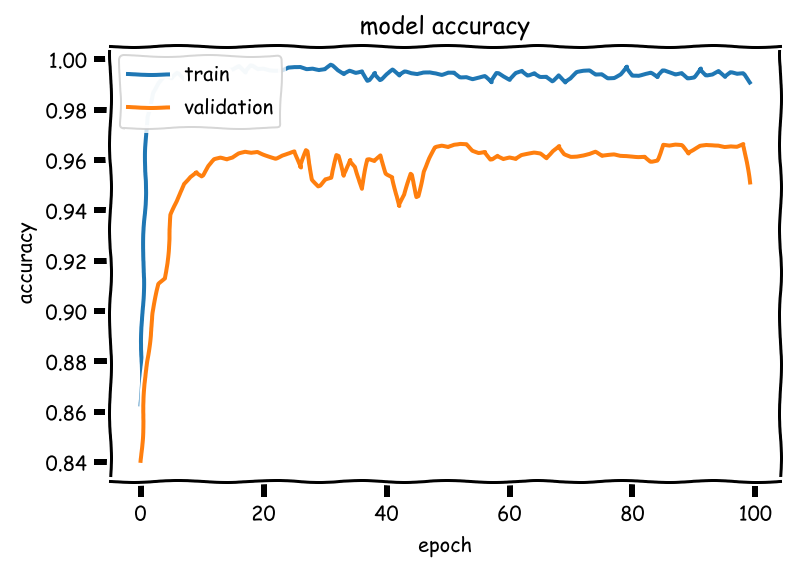

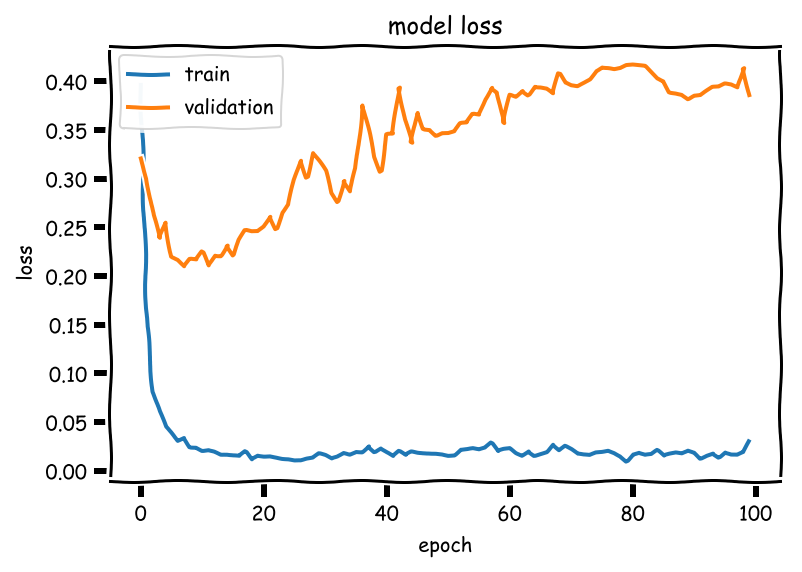

In [117]:
model = create_model()
history = model.fit(X.values, Y.values, validation_split=0.50, epochs=100, batch_size=50, verbose=0)


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Here we are training the model and getting the related graphs. 

### We get the result with good accuracy. 

In [118]:
print("Training accuracy: %.2f%% / Validation accuracy: %.2f%%" % 
      (100*history.history['acc'][-1], 100*history.history['val_acc'][-1]))

Training accuracy: 99.06% / Validation accuracy: 95.10%


In [119]:
from keras import backend as K
import numpy as np

layer_of_interest=0
intermediate_tensor_function = K.function([model.layers[0].input],[model.layers[layer_of_interest].output])
intermediate_tensor = intermediate_tensor_function([X.iloc[0,:].values.reshape(1,-1)])[0]

In [120]:
intermediates = []
color_intermediates = []
for i in range(len(X)):
    output_class = np.argmax(Y.iloc[i,:].values)
    intermediate_tensor = intermediate_tensor_function([X.iloc[i,:].values.reshape(1,-1)])[0]
    intermediates.append(intermediate_tensor[0])
    if(output_class == 0):
        color_intermediates.append("#0000ff")
    else:
        color_intermediates.append("#ff0000")

### The penultimate layer has 10 neurons. We are going to build a t-SNE projection:




In [121]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
intermediates_tsne = tsne.fit_transform(intermediates)

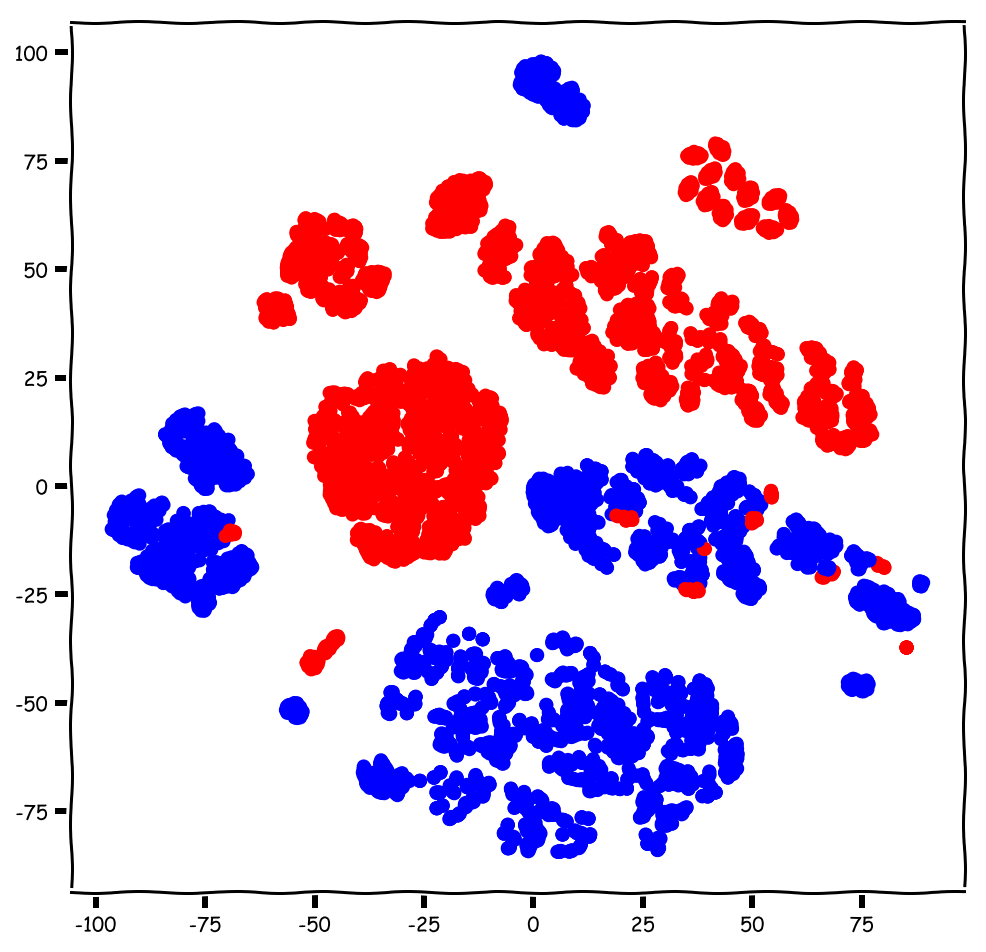

In [122]:
plt.figure(figsize=(8, 8))
plt.scatter(x = intermediates_tsne[:,0], y=intermediates_tsne[:,1], color=color_intermediates)
plt.show()

### We have an image where it shows clearly : 

Blue: Edible
Red: Poisonous 